In [2]:
# load dataset
import pandas as pd
df = pd.read_csv("auto_mpg_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df['origin'].value_counts()

origin
1    245
3     79
2     68
Name: count, dtype: int64

In [5]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [6]:
df.drop(columns=['car name'], axis=1, inplace=True)

In [7]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1


In [8]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [9]:
X = df.drop(columns=['mpg'], axis=1)
y = (df['mpg'] > df['mpg'].median()).astype(int)

In [10]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# scaled and normalized data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [13]:
y_pred = model.predict(X_test_scaled)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [14]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[32, 10],
       [ 2, 35]])

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f"Accuracy of model is {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision of model is {precision_score(y_test, y_pred)*100:.2f}%")
print(f"Recall of model is {recall_score(y_test, y_pred)*100:.2f}%")

Accuracy of model is 84.81%
Precision of model is 77.78%
Recall of model is 94.59%


              precision    recall  f1-score   support

           0       0.94      0.76      0.84        42
           1       0.78      0.95      0.85        37

    accuracy                           0.85        79
   macro avg       0.86      0.85      0.85        79
weighted avg       0.86      0.85      0.85        79



<Axes: >

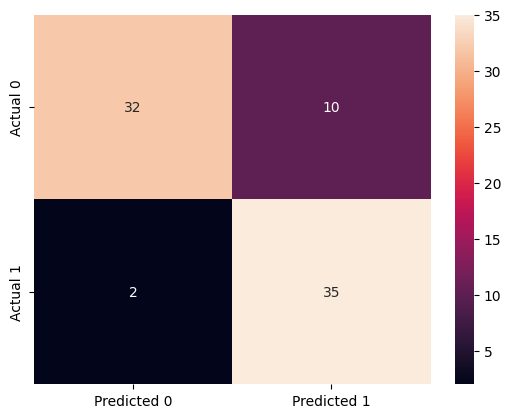

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

In [17]:
import joblib as jb
jb.dump(model, 'logistic_model.pkl')
jb.dump(scaler, 'mpg_scaler.pkl')

['mpg_scaler.pkl']

In [18]:
#load the model
model = jb.load('logistic_model.pkl')
scale = jb.load('mpg_scaler.pkl')

In [19]:
import numpy as np
cyl = int(input("Enter the number of cylinders(2 to 10): "))
dsp = float(input("Enter displacement(60 to 550): "))
hp = float(input("Enter horsepower(40 to 300): "))
wt = int(input("Enter weight(1600 to 5200): "))
acc = int(input("Enter acceleration(2 to 26): "))
mody = int(input("Enter model year(70 to 98): "))
org = int(input("Enter origin(1 for USA, 2 for Japan, 3 for Europe): "))

#convert it numpy array
new_data = np.array([[cyl, dsp, hp, wt, acc, mody, org]])

#scale the data
new_data_scaled = scaler.transform(new_data)

#prediction
prediction = model.predict(new_data_scaled)
print(prediction)

if prediction[0] == 1:
    print("The car is likely to have good mileage.")
else:
    print("The car is likely to have poor mileage.")

[1]
The car is likely to have good mileage.


/home/rashmin/Codeshit/techsaksham/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy of Naive Bayes model is 87.34%
Precision of Naive Bayes model is 80.00%
Recall of Naive Bayes model is 97.30%
              precision    recall  f1-score   support

           0       0.97      0.79      0.87        42
           1       0.80      0.97      0.88        37

    accuracy                           0.87        79
   macro avg       0.89      0.88      0.87        79
weighted avg       0.89      0.87      0.87        79



<Axes: >

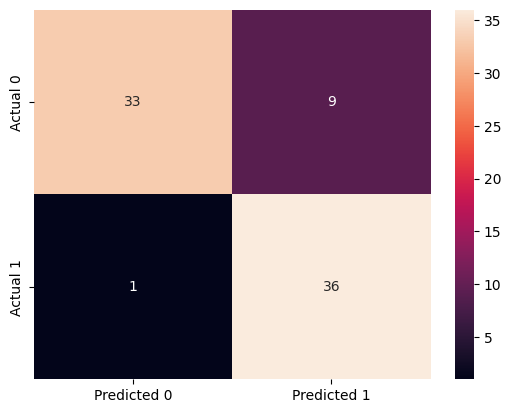

In [20]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_nb_pred = nb_model.predict(X_test_scaled)
print(f"Accuracy of Naive Bayes model is {accuracy_score(y_test, y_nb_pred)*100:.2f}%")
print(f"Precision of Naive Bayes model is {precision_score(y_test, y_nb_pred)*100:.2f}%")
print(f"Recall of Naive Bayes model is {recall_score(y_test, y_nb_pred)*100:.2f}%")
print(classification_report(y_test, y_nb_pred))
cm_nb = confusion_matrix(y_test, y_nb_pred)
sns.heatmap(cm_nb, annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

Accuracy of KNN model is 88.61%
Precision of KNN model is 81.82%
Recall of KNN model is 97.30%


<Axes: >

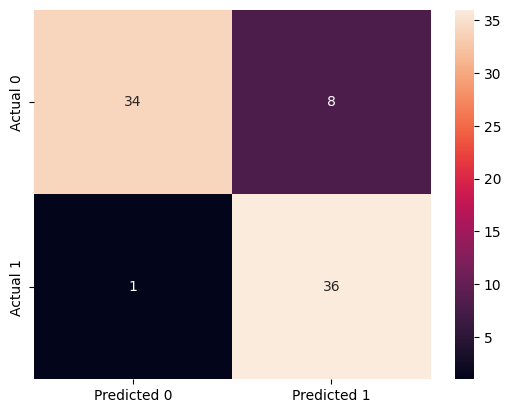

In [24]:
# implementing KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_knn_pred = knn_model.predict(X_test_scaled)
print(f"Accuracy of KNN model is {accuracy_score(y_test, y_knn_pred)*100:.2f}%")
print(f"Precision of KNN model is {precision_score(y_test, y_knn_pred)*100:.2f}%")
print(f"Recall of KNN model is {recall_score(y_test, y_knn_pred)*100:.2f}%")
# plot KNN
cm_knn = confusion_matrix(y_test, y_knn_pred)
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])